In [ ]:
from deap import base, benchmarks, creator, tools, algorithms
import matplotlib.pyplot as plt
import numpy as np
import random
import array
import json

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


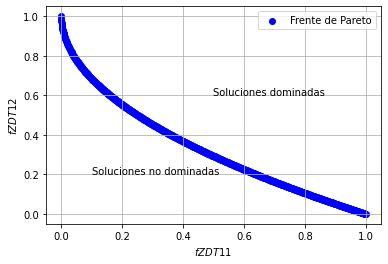

In [ ]:
plt.figure()
with open("zdt1_front.json") as optimal_front_data:
        optimal_front = json.load(optimal_front_data)
        
voptimalfront = np.array(optimal_front)

plt.scatter(voptimalfront[:,0], voptimalfront[:,1], color ="b")
plt.xlabel("$fZDT11$")
plt.ylabel("$fZDT12$")
plt.annotate("Soluciones dominadas", (0.5,0.6))
plt.annotate("Soluciones no dominadas", (0.1,0.2))
plt.legend(["Frente de Pareto"])
plt.grid(True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


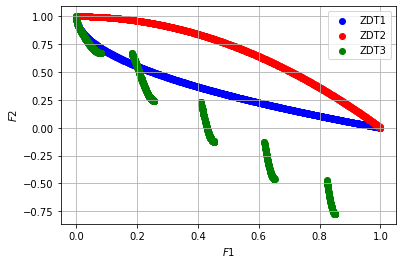

In [ ]:
plt.figure()
with open("zdt1_front.json") as optimal_front_data:
        optimal_front_zdt1 = json.load(optimal_front_data)

with open("zdt2_front.json") as optimal_front_data_zdt2:
        optimal_front_zdt2 = json.load(optimal_front_data_zdt2)

with open("zdt3_front.json") as optimal_front_data_zdt3:
        optimal_front_zdt3 = json.load(optimal_front_data_zdt3)
        
zdt1 = np.array(optimal_front_zdt1)
zdt2 = np.array(optimal_front_zdt2)
zdt3 = np.array(optimal_front_zdt3)

plt.scatter(zdt1[:,0], zdt1[:,1], color ="b", label = "ZDT1")
plt.scatter(zdt2[:,0], zdt2[:,1], color ="r", label = "ZDT2")
plt.scatter(zdt3[:,0], zdt3[:,1], color ="g", label = "ZDT3")
plt.xlabel("$F1$")
plt.ylabel("$F2$")
plt.legend()
plt.grid(True)
plt.savefig("tipos_frente.eps", dpi = 300)

/root/venv/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/root/venv/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


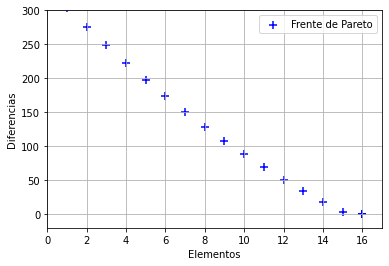

In [ ]:
random.seed(42) 

# Límites de los valores del conjunto
LIMITE_INF, LIMITE_SUP = 0, 30
# Número de elementos del conjunto 
TAM_CONJUNTO = 30 
SUMA_OBJETIVO = 333
CONJUNTO = np.array(random.sample(range(LIMITE_INF, LIMITE_SUP), 
                                  TAM_CONJUNTO))

# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMulti", base.Fitness, weights=(-1.0, -1.0)) 
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()

# Generación de individuos aleatorios
def crea_individuo(size):
    return [random.randint(0, 1) for i in range(size)]

# Generación de individuos y población inicial    
toolbox.register("attr", crea_individuo, TAM_CONJUNTO)
toolbox.register("individual", tools.initIterate, creator.Individual, 
                 toolbox.attr)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

# Función objetivo
def funcion_objetivo(individuo, suma_objetivo):
    """
    Función objetivo para el problema de la suma de subconjutos
    Entrada: Recibe como entrada el individuo y la suma objetivo 
    que se tiene que satisfacer con la suma de los elementos del subconjuto.
    Salida: Como objetivo 1 se devuelve el número de elementos del
    subconjunto. Como objetivo 2 se devuelve la diferencia con respecto
    a la suma objetivo.
    """
    subconjunto = CONJUNTO[np.array(individuo) == 1]
    suma_subconjunto = np.sum(subconjunto)
    diferencia = suma_objetivo - suma_subconjunto
    n_elementos = sum(individuo)
    if diferencia < 0: # nos pasamos
        return 10000, 10000 # pena de muerte    
    if n_elementos == 0: # no se selecciona ninguna elemento
        return 10000, 10000
    return n_elementos, diferencia

# Registro de operadores genéticos y función objetivo
toolbox.register("mate", tools.cxTwoPoint) 
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05) 
toolbox.register("select", tools.selNSGA2) 
toolbox.register("evaluate", funcion_objetivo, suma_objetivo=SUMA_OBJETIVO) 


def plot_frente(pareto):
    """
    Representación del frente de Pareto que hemos obtenido
    """
    pareto_x, pareto_y = ([ind.fitness.values[i] for ind in pareto] for i in range(2))
    plt.scatter(pareto_x, pareto_y, marker="+", color="b", s=50)
    plt.xlabel("Elementos")
    plt.ylabel("Diferencias")
    plt.grid(True)
    plt.xlim([0, 17])
    plt.ylim([-20, 300])
    plt.legend(["Frente de Pareto"], loc="upper right")


def main():
    CXPB, MUTPB, NGEN = 0.7, 0.3, 200
    MU, LAMBDA = 300, 300
    pop = toolbox.population(MU)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()  
    pareto = tools.ParetoFront() 
    pop, logbook = algorithms.eaMuPlusLambda(
        pop , toolbox , mu=MU, 
        lambda_=LAMBDA, cxpb=CXPB,  
        mutpb=MUTPB, ngen=NGEN, 
        stats=stats, halloffame=pareto, 
        verbose=False
    )

    return pop, logbook, pareto
     

pop, log, pareto = main()
plot_frente(pareto)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


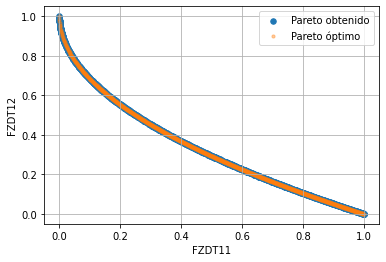

In [ ]:
BOUND_LOW, BOUND_UP = 0.0, 1.0 
NDIM = 10 

# Creamos los objetos para definir el problema y el tipo de individuo
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0)) 
creator.create("Individual", array.array, typecode='d', fitness=creator.FitnessMin)

# Generación de individuos aleatorios
def crea_individuo(low, up, size):
    return [random.uniform(low, up) for i in range(size)]

toolbox = base.Toolbox()

# Generación de individuos y población inicial    
toolbox.register("attr_float", crea_individuo, BOUND_LOW, BOUND_UP, NDIM)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_float)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Registro de operadores genéticos y función objetivo
toolbox.register("mate", tools.cxSimulatedBinaryBounded,low=BOUND_LOW, up=BOUND_UP, eta=20.0) 
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=20.0,indpb=1.0/NDIM)
toolbox.register("select", tools.selNSGA2) 
toolbox.register("evaluate", benchmarks.zdt1) 

def plot_frente(pareto):
    """
    Representación del frente de Pareto que hemos obtenido
    """
    pareto_x, pareto_y = ([ind.fitness.values[i] for ind in pareto] for i in range(2))
    plt.scatter(pareto_x, pareto_y, marker="+", color="b", s=50)

    plt.scatter(datos_pareto[:, 0], datos_pareto[:, 1], s=30)    
    
    # obtenermos el Pareto óptimo
    with open("zdt1_front.json") as optimal_front_data:
        pareto_optimo = np.array(json.load(optimal_front_data))
    plt.scatter(pareto_optimo[:, 0], pareto_optimo[:, 1], s=10, alpha=0.4)

    plt.xlabel("FZDT11")
    plt.ylabel("FZDT12")
    plt.grid(True)
    plt.legend(["Pareto obtenido","Pareto óptimo"], loc="upper right")


def main():
    CXPB , MUTPB , NGEN = 0.7, 0.3, 200
    MU, LAMBDA = 100, 100
    pop = toolbox.population(MU)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    logbook = tools.Logbook()  
    pareto = tools.ParetoFront() 
    pop, logbook = algorithms.eaMuPlusLambda(
        pop , toolbox , mu=MU,
        lambda_=LAMBDA, cxpb=CXPB,
        mutpb=MUTPB, ngen=NGEN, 
        stats=stats, halloffame=pareto,
        verbose=False
    )

    return pop, logbook, pareto
        
random.seed(42)    
pop, log, pareto = main()
plot_frente()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=183a4102-ed36-4d8f-a68e-0f907c31c07b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>